In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [94]:
df = pd.read_csv('analyze.csv')
df.head()

,Unnamed: 0,id,feed_url,title,subtitle,description,summary,author,email,link,language,explicit,image,category,subcategory,created_at,last_build_date,rating
0,0,0002da5f-49a2-31ba-b44c-cdeabdf113cb,http://www.cbc.ca/podcasting/includes/dispatch...,Dispatches from CBC Radio,NaN,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio,podcasting@cbc.ca,http://www.cbc.ca/podcasting,en-ca,0,http://www.cbc.ca/podcasting/images/promo-disp...,News & Politics,Public Radio,2016-11-27T03:15:54,2016-11-27T03:15:54,2
1,1,00044845-beb8-35f3-99e2-01dbcfb6eb63,http://everydayissaturday.com/feed/podcast/,Motivation | Inspiration| Success with Entrepr...,Motivation - Inspiration - Success - Mindset -...,Sam Crowley delivers million dollar motivation...,Sam Crowley delivers million dollar motivation...,Sam Crowley,sam@everydayissaturday.com,http://everydayissaturday.com,en-us,0,http://everydayissaturday.com/wp-content/uploa...,Business,Business,2016-11-26T19:11:59,2016-11-21T14:19:34,2
2,2,00048bfa-8363-3f10-ac8e-8f27a31fe11f,http://disability411.jinkle.com/disability411.xml,Disability411 Podcast,NaN,Disability411 - The Podcast for Disability Inf...,NaN,Beth Case,NaN,http://disability411.jinkle.com/,en-us,0,NaN,Government & Organizations,Business,2016-11-27T00:37:30,2016-11-27T00:37:30,3
3,3,0005ab14-ea88-3038-b82c-86366713e96a,http://stevenredant.podomatic.com/rss2.xml,Steven Redant's Podcast,"Energy for your work out, your travels and you...",En example of what happened on my dance floor ...,En example of what happened on my dance floor ...,Steven Redant (the RedAnt),NaN,NaN,en-gb,0,https://assets.podomatic.net/ts/b8/34/09/steve...,Music,NaN,2016-11-26T18:37:07,2016-11-26T18:37:07,2
4,4,0005eac4-fa5d-3c33-a354-ad7928f3705b,http://api.spokenlayer.com/feed/channel/v1-wir...,WIRED News – Spoken Edition,NaN,Get in-depth coverage of current and future tr...,Get in-depth coverage of current and future tr...,WIRED,distribution@spokenlayer.com,http://www.spokenlayer.com,en,0,\n http://media.spokenlayer...,Technology,NaN,2016-11-27T06:46:08,2016-11-25T08:11:13,2


In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32832 entries, 0 to 32831
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       32832 non-null  int64 
 1   id               32832 non-null  object
 2   feed_url         32832 non-null  object
 3   title            31524 non-null  object
 4   subtitle         26086 non-null  object
 5   description      30082 non-null  object
 6   summary          27287 non-null  object
 7   author           30120 non-null  object
 8   email            27256 non-null  object
 9   link             15358 non-null  object
 10  language         32479 non-null  object
 11  explicit         32832 non-null  int64 
 12  image            30471 non-null  object
 13  category         30409 non-null  object
 14  subcategory      19473 non-null  object
 15  created_at       32832 non-null  object
 16  last_build_date  32832 non-null  object
 17  rating           32832 non-null

In [96]:
print(df.shape)
print(df.dtypes)

(32832, 18)
Unnamed: 0          int64
id                 object
feed_url           object
title              object
subtitle           object
description        object
summary            object
author             object
email              object
link               object
language           object
explicit            int64
image              object
category           object
subcategory        object
created_at         object
last_build_date    object
rating              int64
dtype: object


In [97]:
df.describe()

,Unnamed: 0,explicit,rating
count,32832.000000,32832.000000,32832.000000
mean,16415.500000,0.093202,2.990619
std,9477.926355,0.290719,1.418548
min,0.000000,0.000000,1.000000
25%,8207.750000,0.000000,2.000000
50%,16415.500000,0.000000,3.000000
75%,24623.250000,0.000000,4.000000
max,32831.000000,1.000000,5.000000


In [98]:
df.count()

Unnamed: 0         32832
id                 32832
feed_url           32832
title              31524
subtitle           26086
description        30082
summary            27287
author             30120
email              27256
link               15358
language           32479
explicit           32832
image              30471
category           30409
subcategory        19473
created_at         32832
last_build_date    32832
rating             32832
dtype: int64

<AxesSubplot:>

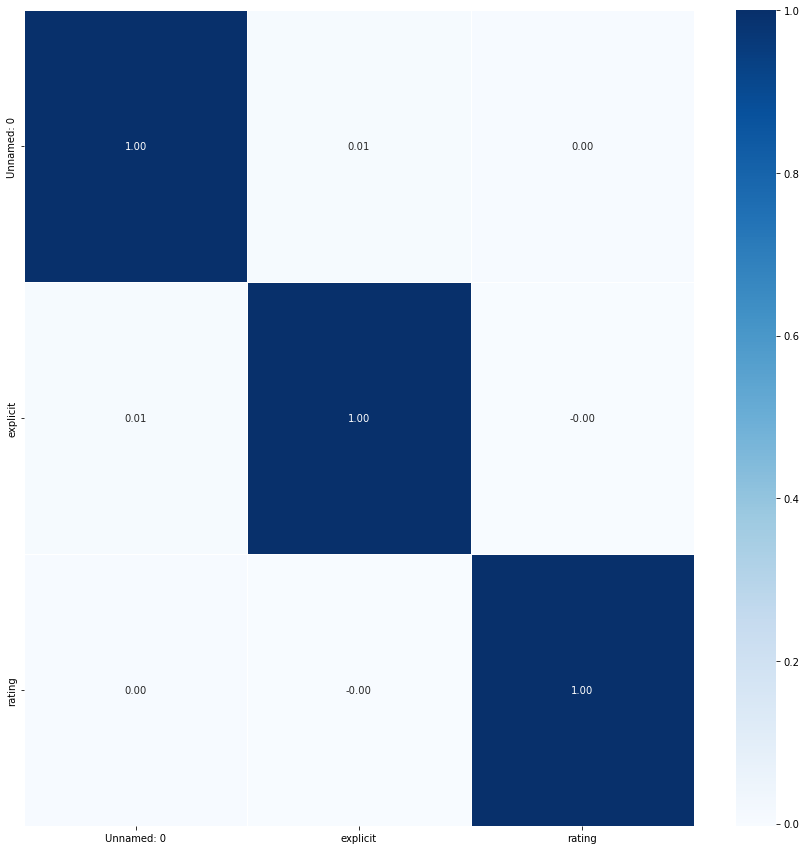

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [100]:
df_new = df[0:10000]

In [101]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df_new['description'] = df_new['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_new['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

C:\Users\User\AppData\Local\Temp/ipykernel_18652/1680687102.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['description'] = df_new['description'].fillna('')


(10000, 34212)

In [102]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [103]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df_new.index, index=df_new['title']).drop_duplicates()

In [104]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_new['title'].iloc[movie_indices]

In [105]:
get_recommendations('The Kyle Warren Radio Show')

910                                   The Malliard Report
9439                                         Comments on:
7675                   Cato Institute Event Videos (Full)
1661    The Motivational Marketing Show with Robert Im...
9171             RTÉ - Our War - The Great Debate podcast
7615                                William Hill Football
5865    Clone Wars Roundtable: Information, Commentary...
6184    Republic Forces Radio Network -- A Star Wars C...
1211                                   Far Far Away Radio
5382                                           Drone News
Name: title, dtype: object

In [106]:
get_recommendations('Youth Radio')

1216                    Life In Student Ministry
679                       St Matts Youth Podcast
2999                                quitebuttery
2991               homefries » Shows » The Crush
7539    Tomorrowland 2012 – House Music Podcasts
8235                 Chicago Youthcure PowerCast
8361                             Radio 1 Stories
8444                       Coaching Youth Soccer
3623                                    OK Radio
7853                     The Pretty Good Podcast
Name: title, dtype: object

In [107]:
get_recommendations('Archaic Drum')

6217                   Manna Church Audio Sermon Archives
9424                                        Finding Bryan
3623                                             OK Radio
8714                              A Swift Kick In The Ass
5365                                            Drum Talk
9116           Best Life of Your Life | The BLOYL Podcast
8630    catalyst ..:|:..  hip to be civic ..:|:.. birm...
4343                     Thinking For Business Success UK
9939                       Pathways Radio by Paul O'Brien
5624         mu''a'vo' mu' - A Klingon Word from the Word
Name: title, dtype: object

In [108]:
df_new1 = df[['title','author', 'language', 'category', 'subcategory']]
df_new1.head(3)

,title,author,language,category,subcategory
0,Dispatches from CBC Radio,CBC Radio,en-ca,News & Politics,Public Radio
1,Motivation | Inspiration| Success with Entrepr...,Sam Crowley,en-us,Business,Business
2,Disability411 Podcast,Beth Case,en-us,Government & Organizations,Business


In [109]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [110]:
# Apply clean_data function to your features.
features = ['author', 'language', 'category', 'subcategory']

for feature in features:
    df_new1[feature] = df_new1[feature].apply(clean_data)
df_new1.head(3)    

C:\Users\User\AppData\Local\Temp/ipykernel_18652/3214209218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1[feature] = df_new1[feature].apply(clean_data)


,title,author,language,category,subcategory
0,Dispatches from CBC Radio,cbcradio,en-ca,news&politics,publicradio
1,Motivation | Inspiration| Success with Entrepr...,samcrowley,en-us,business,business
2,Disability411 Podcast,bethcase,en-us,government&organizations,business


In [111]:
def create_soup(x):
    return  x['author'] + ' ' + x['language'] + ' ' + x['category'] + ' ' + x['subcategory']
df100 = df_new1.copy()        
df_new1['soup'] = df_new1.apply(create_soup, axis=1)
df_new1['soup']

C:\Users\User\AppData\Local\Temp/ipykernel_18652/2119449595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['soup'] = df_new1.apply(create_soup, axis=1)


0                 cbcradio en-ca news&politics publicradio
1                       samcrowley en-us business business
2         bethcase en-us government&organizations business
3                     stevenredant(theredant) en-gb music 
4                                     wired en technology 
                               ...                        
32827               specialneedskids en family kids&family
32828    kimgreenhouse en-us business religion&spiritua...
32829                                 ringtales en comedy 
32830                 dmoneyandxebrielle en tv&film health
32831                       idobinetwork en-us music music
Name: soup, Length: 32832, dtype: object

In [112]:
df_new2 = df_new1[0:10000]
df_new2

,title,author,language,category,subcategory,soup
0,Dispatches from CBC Radio,cbcradio,en-ca,news&politics,publicradio,cbcradio en-ca news&politics publicradio
1,Motivation | Inspiration| Success with Entrepr...,samcrowley,en-us,business,business,samcrowley en-us business business
2,Disability411 Podcast,bethcase,en-us,government&organizations,business,bethcase en-us government&organizations business
3,Steven Redant's Podcast,stevenredant(theredant),en-gb,music,,stevenredant(theredant) en-gb music
4,WIRED News – Spoken Edition,wired,en,technology,,wired en technology
...,...,...,...,...,...,...
9995,World Crisis Radio,webstertarpley,en-us,news&politics,news&politics,webstertarpley en-us news&politics news&politics
9996,League Of Unextraordinary Gentlemen,toastermenpodcastnetwork,en-us,ebooks,arts,toastermenpodcastnetwork en-us ebooks arts
9997,The Marriage Podcast,hopemedia,en-au,,,hopemedia en-au
9998,angelcast's Podcast,angelfarringdon,en,music,,angelfarringdon en music


In [113]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_new2['soup'])
count_matrix

<10000x9916 sparse matrix of type '<class 'numpy.int64'>'
	with 42732 stored elements in Compressed Sparse Row format>

In [114]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [115]:
df_new1 = df_new1.reset_index()
indices = pd.Series(df_new1.index, index=df_new1['title'])

In [116]:
get_recommendations('The Kyle Warren Radio Show', cosine_sim2)

1386     Blubrry Podcasting: Harvey Litt's mycast
6822                     Open Spaces (Whole Show)
74                         The Robert Wenzel Show
3698                               Fox News Flash
5134         Resonance: An Anarchist Audio Distro
5555            Behind the News with Doug Henwood
6947                      The Erick Erickson Show
53      Logos Radio Network » Truth Exposed Radio
145                                 Bill O'Reilly
417                   Bill Moyers in Conversation
Name: title, dtype: object

In [117]:
get_recommendations('Archaic Drum', cosine_sim2)

287                                       The Fetish Show
722     Barbell Buddha Podcast - with Chris Moore from...
1007                                   VEGAN SNACK ATTACK
1379            RMIRECC Short Takes on Suicide Prevention
2792                              The Minimalists Podcast
2992                                     O Woman! Podcast
3969                      Hillary's Yoga Practice Podcast
4110              Black Femdom Goddess | the Black Fuhrer
4479                                   Death, Sex & Money
4543                            Mental Illness Happy Hour
Name: title, dtype: object

In [118]:
get_recommendations('Youth Radio')

1216                    Life In Student Ministry
679                       St Matts Youth Podcast
2999                                quitebuttery
2991               homefries » Shows » The Crush
7539    Tomorrowland 2012 – House Music Podcasts
8235                 Chicago Youthcure PowerCast
8361                             Radio 1 Stories
8444                       Coaching Youth Soccer
3623                                    OK Radio
7853                     The Pretty Good Podcast
Name: title, dtype: object